In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\villemaj\OneDrive - Oulun ammattikorkeakoulu\Data Analysis\Test data\openpowerlifting-2023-08-12\openpowerlifting-2023-08-12-9f1b3427.csv", parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)
df

C:\Users\villemaj\AppData\Local\Temp\ipykernel_24780\3044423878.py:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\villemaj\OneDrive - Oulun ammattikorkeakoulu\Data Analysis\Test data\openpowerlifting-2023-08-12\openpowerlifting-2023-08-12-9f1b3427.csv", parse_dates=['Date'], index_col='Date')


,Date,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,...,Goodlift,Tested,Country,State,Federation,ParentFederation,MeetCountry,MeetState,MeetTown,MeetName
0,2019-05-11,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,...,57.10,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
1,2019-05-11,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,...,56.76,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
2,2019-05-11,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,...,41.24,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
3,2019-05-11,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,...,66.68,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
4,2019-05-11,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,...,39.34,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956811,2016-11-14,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,...,93.16,Yes,Ukraine,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956812,2016-11-14,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,...,90.57,Yes,Hungary,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956813,2016-11-14,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,...,88.89,Yes,Netherlands,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956814,2016-11-14,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,...,72.24,Yes,England,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships


T-test is testing between two groups which are normally distributed, ANOVA for two or more groups. Different tests if data is not normally distributed.

<AxesSubplot: xlabel='TotalKg', ylabel='Count'>

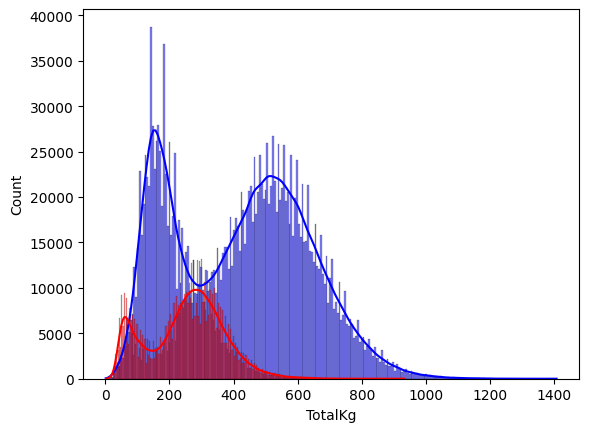

In [2]:
import seaborn as sns
sample1 = df['TotalKg'].loc[df['Sex'] == 'M'].dropna()
sample2 = df['TotalKg'].loc[df['Sex'] == 'F'].dropna()

sns.histplot(sample1, kde=True, color='blue')
sns.histplot(sample2, kde=True, color='red')    

In [3]:
#performing t-test
from scipy.stats import ttest_ind
t, p, = ttest_ind(sample1, sample2)

print('t =', t)
print('p =', p)

t = 618.256177238349
p = 0.0


In [6]:
print(len(sample1))

2072776


In [10]:
#test if data is normally distributed
from scipy.stats import shapiro
list1 = sample1.tolist()
list2 = sample2.tolist()    

downsampled1 = list1[::500]
  
stat, p = shapiro(sample1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#test results, if p > alpha, then data is normally distributed
alpha = 0.05
if p > alpha:
    print('Sample1 looks Gaussian (fail to reject H0)')
else:
    print('Sample1 does not look Gaussian (reject H0)')

Statistics=0.966, p=0.000
Sample1 does not look Gaussian (reject H0)


<AxesSubplot: xlabel='TotalKg', ylabel='Count'>

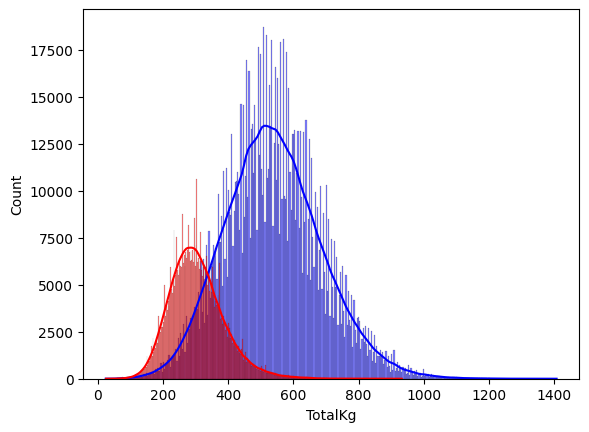

In [11]:
#filter data to get only totalKg of SBD (squat, bench, deadlift)
df2 = df.loc[df['Event'] == 'SBD']
sample1 = df2['TotalKg'].loc[df2['Sex'] == 'M'].dropna()
sample2 = df2['TotalKg'].loc[df2['Sex'] == 'F'].dropna()

sns.histplot(sample1, kde=True, color='blue')
sns.histplot(sample2, kde=True, color='red')    

In [12]:
#test if data is normally distributed
from scipy.stats import shapiro   

  
stat, p = shapiro(sample1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#test results, if p > alpha, then data is normally distributed
alpha = 0.05
if p > alpha:
    print('Sample1 looks Gaussian (fail to reject H0)')
else:
    print('Sample1 does not look Gaussian (reject H0)')

Statistics=0.995, p=0.000
Sample1 does not look Gaussian (reject H0)


c:\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<AxesSubplot: xlabel='TotalKg', ylabel='Count'>

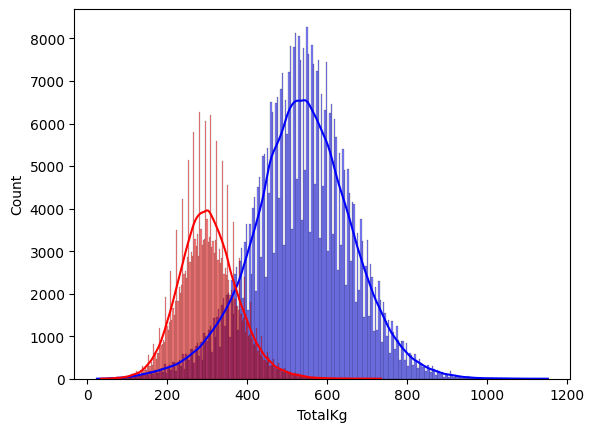

In [14]:
#filter data more to get only totalKg of SBD (squat, bench, deadlift) and only raw
df3 = df2.loc[df2['Equipment'] == 'Raw']
sample1 = df3['TotalKg'].loc[df3['Sex'] == 'M'].dropna()
sample2 = df3['TotalKg'].loc[df3['Sex'] == 'F'].dropna()

sns.histplot(sample1, kde=True, color='blue')
sns.histplot(sample2, kde=True, color='red')   

In [15]:
#test if data is normally distributed
from scipy.stats import shapiro   

  
stat, p = shapiro(sample1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#test results, if p > alpha, then data is normally distributed
alpha = 0.05
if p > alpha:
    print('Sample1 looks Gaussian (fail to reject H0)')
else:
    print('Sample1 does not look Gaussian (reject H0)')

Statistics=0.998, p=0.000
Sample1 does not look Gaussian (reject H0)


c:\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<AxesSubplot: xlabel='TotalKg', ylabel='Count'>

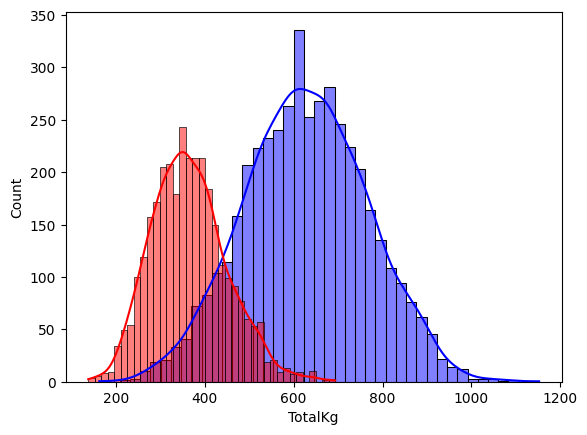

In [16]:
#filter data more to get only totalKg of SBD (squat, bench, deadlift) and only raw and IPF
df4 = df3.loc[df3['Federation'] == 'IPF']
sample1 = df4['TotalKg'].loc[df4['Sex'] == 'M'].dropna()
sample2 = df4['TotalKg'].loc[df4['Sex'] == 'F'].dropna()

sns.histplot(sample1, kde=True, color='blue')
sns.histplot(sample2, kde=True, color='red')   

In [17]:
#test if data is normally distributed
from scipy.stats import shapiro   

  
stat, p = shapiro(sample1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#test results, if p > alpha, then data is normally distributed
alpha = 0.05
if p > alpha:
    print('Sample1 looks Gaussian (fail to reject H0)')
else:
    print('Sample1 does not look Gaussian (reject H0)')

Statistics=0.999, p=0.100
Sample1 looks Gaussian (fail to reject H0)


In [18]:
print(df['Country'].value_counts())

USA              778614
Russia           276849
Ukraine           85609
Canada            65258
England           52866
                  ...  
Lesotho               1
Senegal               1
Guinea-Bissau         1
Rhodesia              1
Djibouti              1
Name: Country, Length: 193, dtype: int64


Drop countries out which have less than 100 data samples in dataset ('TotalKg)
So first filter the data using SBD, IPF, Raw parameters and then drop out countries with less than 100 data samples

In [19]:
df_full_power = df.loc[(df['Event'] == 'SBD') & (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')]
df_full_power['TotalKg'].describe()

count    7548.000000
mean      517.760294
std       176.230609
min       137.500000
25%       370.000000
50%       502.500000
75%       652.500000
max      1152.500000
Name: TotalKg, dtype: float64

In [42]:
#grouping data by country
df_country = pd.DataFrame(df_full_power.groupby('Country'))
df_country

,0,1
0,Algeria,Date Name Sex Event ...
1,Argentina,Date Name Sex Eve...
2,Armenia,Date Name Sex Event...
3,Australia,Date Name Sex Even...
4,Austria,Date Name Sex Ev...
...,...,...
97,Ukraine,Date Name Sex Ev...
98,Uruguay,Date Name Sex Ev...
99,Uzbekistan,Date Name Sex...
100,Wales,Date Name Sex Event Eq...


In [43]:
df_full_power_by_country = df_full_power.groupby('Country').max(['TotalKg']).sort_values(by='TotalKg', ascending=False)
df_full_power_by_country.reset_index(inplace=True)
df_full_power_by_country

,Country,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
0,USA,81.5,189.20,450.0,470.0,470.0,NaN,470.0,255.0,265.0,...,370.0,399.0,410.0,NaN,410.0,1152.5,595.53,621.24,581.27,122.18
1,US Virgin Islands,77.0,167.02,387.5,412.5,427.5,NaN,427.5,232.5,245.0,...,342.5,365.0,342.5,NaN,365.0,1045.0,588.15,570.13,541.59,120.62
2,Nauru,54.5,191.50,410.0,426.5,460.0,NaN,460.0,255.0,265.0,...,310.0,317.5,320.0,NaN,320.0,1035.0,527.35,554.74,519.20,102.19
3,Georgia,39.5,154.75,380.0,375.0,390.0,NaN,390.0,210.0,220.0,...,370.0,385.5,382.5,NaN,385.5,995.5,530.91,548.38,516.68,104.55
4,Canada,76.5,172.50,395.0,410.0,420.0,NaN,420.0,255.0,265.0,...,365.0,385.5,375.0,NaN,385.5,990.0,568.78,562.65,513.85,117.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Portugal,33.5,56.00,125.0,135.0,140.0,NaN,140.0,90.0,-92.5,...,130.0,140.0,-150.0,NaN,140.0,372.5,431.77,438.29,387.68,88.56
98,Uganda,24.5,71.39,100.0,107.5,110.0,NaN,110.0,70.0,72.5,...,142.5,150.0,160.0,NaN,160.0,342.5,342.59,336.20,296.21,69.66
99,China,18.5,69.55,-105.0,105.0,112.5,NaN,112.5,45.0,55.0,...,125.0,-140.0,140.0,NaN,140.0,307.5,232.02,231.58,224.49,46.63
100,Wales,52.5,51.72,82.5,87.5,90.0,NaN,90.0,50.0,55.0,...,112.5,117.5,122.5,NaN,122.5,267.5,327.28,334.87,296.89,67.86


In [44]:
%matplotlib qt
import matplotlib.pyplot as plt
sns.barplot(x='Country', y='TotalKg', data=df_full_power_by_country)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'US Virgin Islands'),
  Text(2, 0, 'Nauru'),
  Text(3, 0, 'Georgia'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Turkey'),
  Text(6, 0, 'Latvia'),
  Text(7, 0, 'Libya'),
  Text(8, 0, 'England'),
  Text(9, 0, 'Switzerland'),
  Text(10, 0, 'Algeria'),
  Text(11, 0, 'Ukraine'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Estonia'),
  Text(14, 0, 'Russia'),
  Text(15, 0, 'Bulgaria'),
  Text(16, 0, 'Ir

In [30]:
import numpy as np

totalKgMeanValues = []
#list data values into list similar way (so without calculating mean values)

for country in df_full_power_by_country['Country']:
    totalKgMeanValues.append(df_full_power.loc[df_full_power['Country'] == country]['TotalKg'].mean())

print(totalKgMeanValues)    

[511.11903693931396, 526.0625, 711.3235294117648, 589.6111111111111, 520.5029239766081, 568.8775510204082, 701.4285714285714, 626.7272727272727, 506.7917704280156, 609.6052631578947, 717.8636363636364, 541.1076923076923, 592.9528301886793, 602.2857142857143, 497.74732620320856, 716.8695652173913, 698.4848484848485, 699.1666666666666, 582.8039215686274, 529.027027027027, 518.3045977011494, 536.9077669902913, 503.0178082191781, 580.175, 558.5326086956521, 523.0735294117648, 566.3033333333333, 493.7248157248157, 612.5227272727273, 610.436507936508, 523.9795918367347, 495.2806324110672, 534.2265625, 707.125, 555.56, 530.7926829268292, 449.6831275720165, 530.6701388888889, 566.25, 631.6929824561404, 689.1666666666666, 421.712962962963, 514.8222222222222, 847.5, 553.9852941176471, 537.2125, 520.152, 492.8027777777778, 551.875, 411.25, 460.6808510638298, 553.75, 644.1666666666666, 505.625, 536.5625, 556.7045454545455, 519.4054054054054, 508.125, 511.2, 592.6724137931035, 632.5, 615.8333333333